## Diamond Price Prediction

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [1]:
import pandas as pd

In [2]:
## Data Ingestions step
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
### No missing values present in the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
## check for duplicated records
df.duplicated().sum()

0

In [9]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [11]:
df['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [12]:
## As you see our data is not imbalanced

In [13]:
df['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [14]:
df['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

In [15]:
# The Problem Occur Here : Is we need domain expert of Diamond to know That cut , clarity has expensive or not , So to figure it out , We have a Website :## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/

### Univariate Analysis

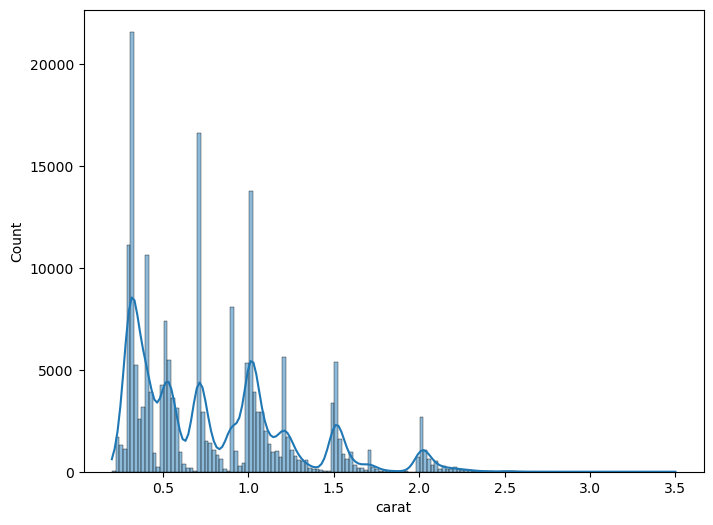

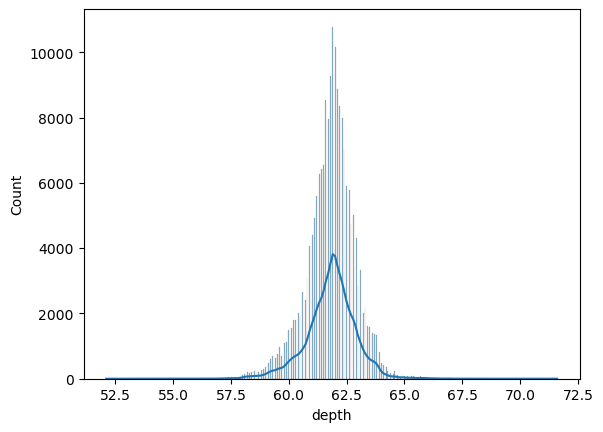

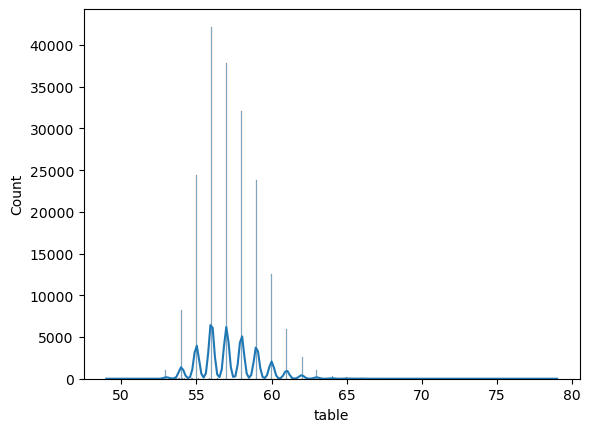

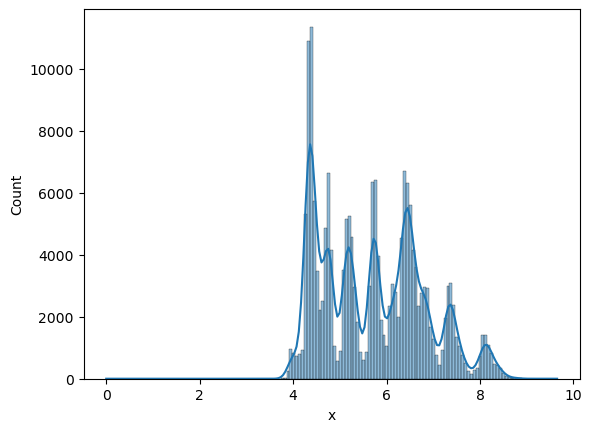

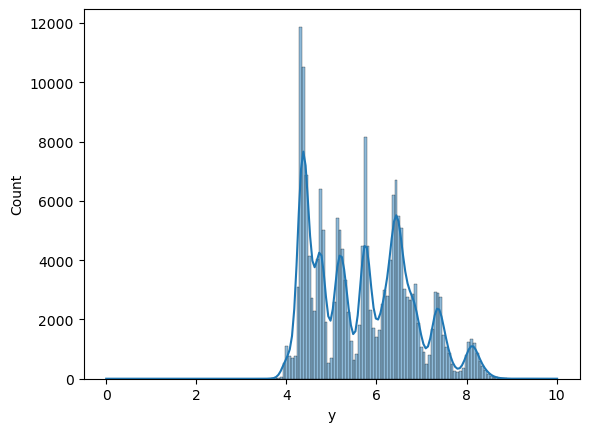

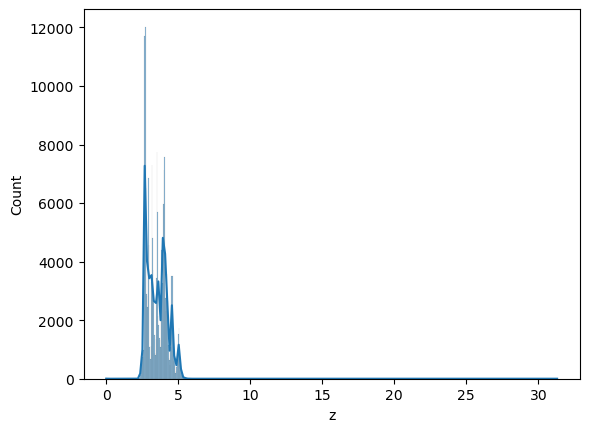

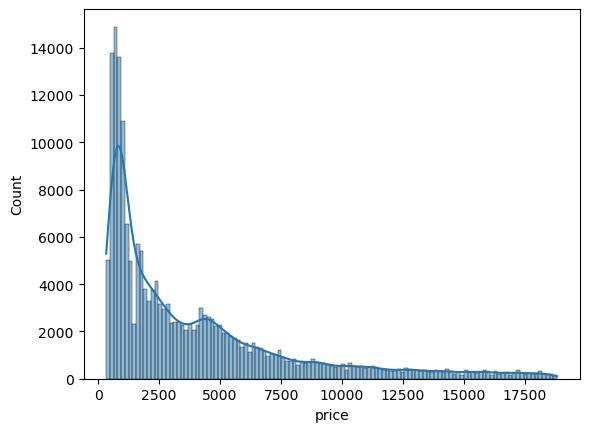

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

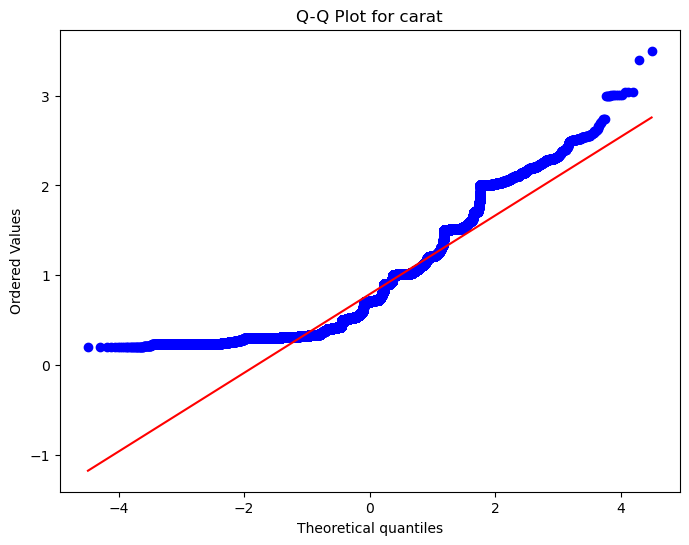

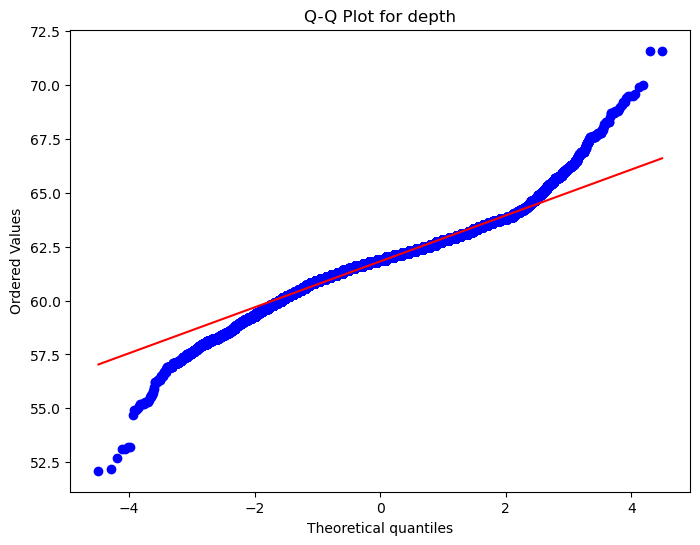

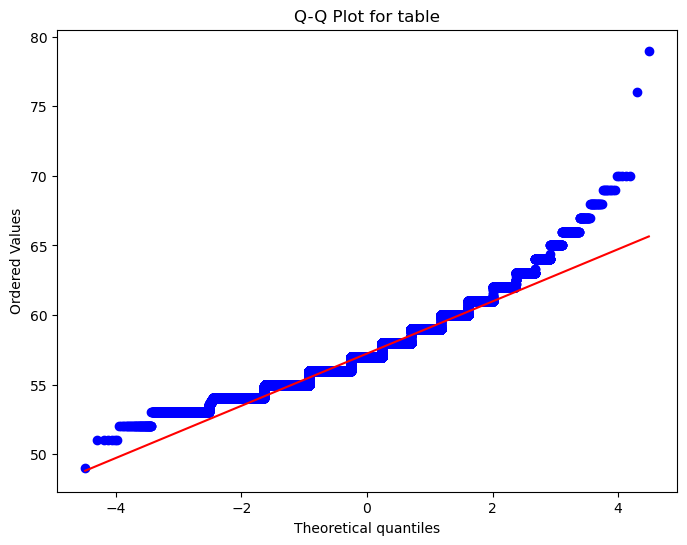

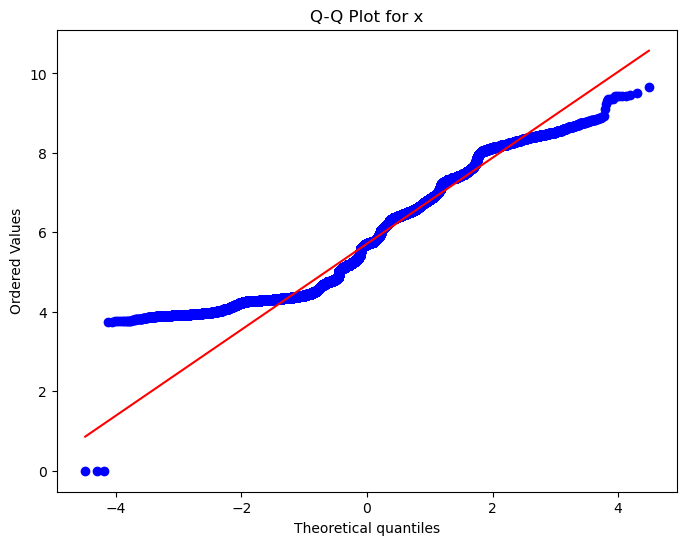

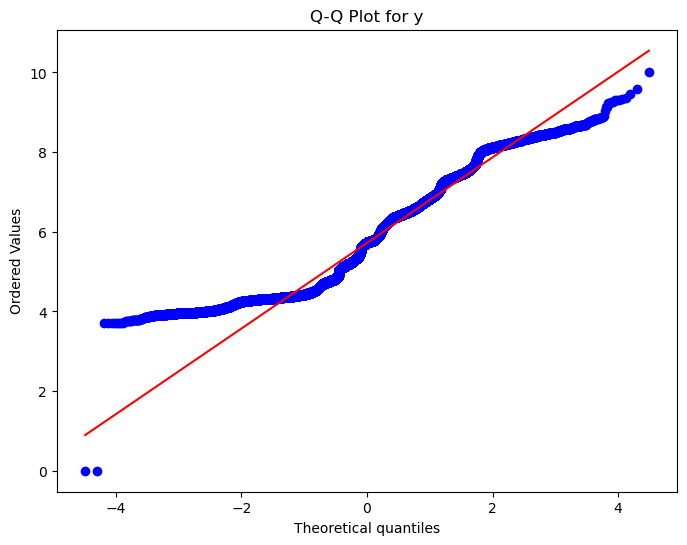

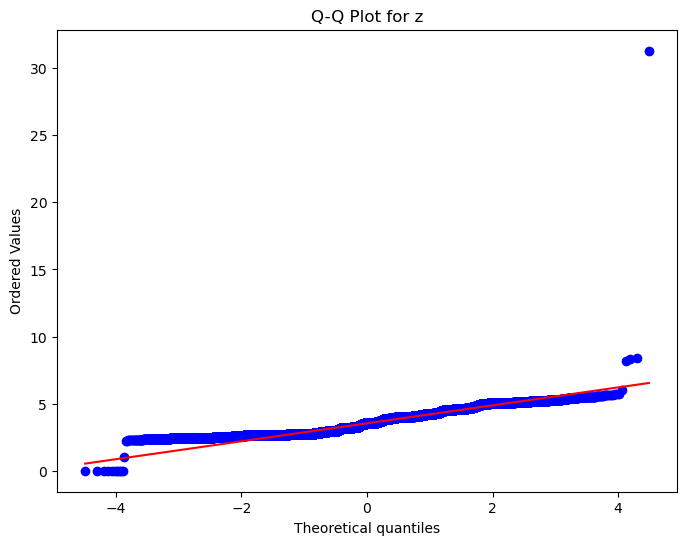

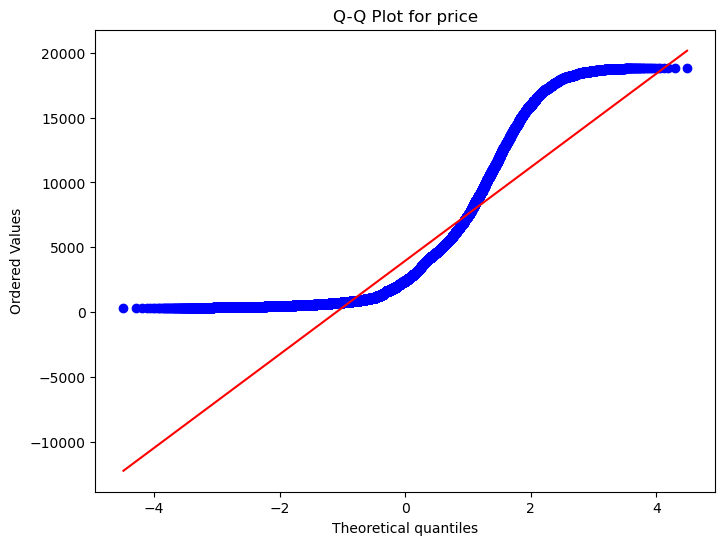

In [17]:
import scipy.stats as stats


# Function to plot Q-Q plots for numerical columns
def plot_qq_plots(data):
    numerical_columns = data.select_dtypes(include=[np.number]).columns

    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {column}')
        plt.show()

# Plot Q-Q plots for numerical columns
plot_qq_plots(df)

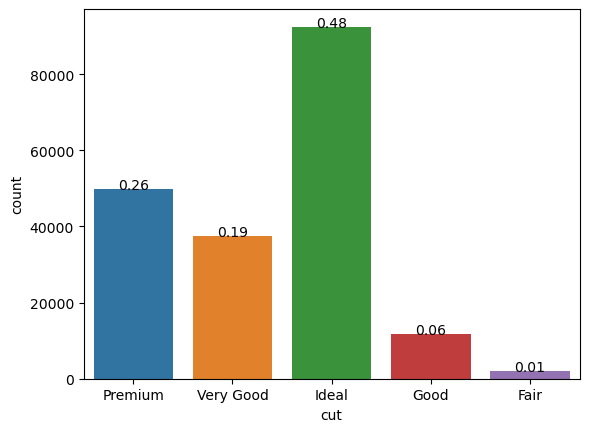

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
total = float(len(df)) # one person per row 
ax = sns.countplot(x="cut", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

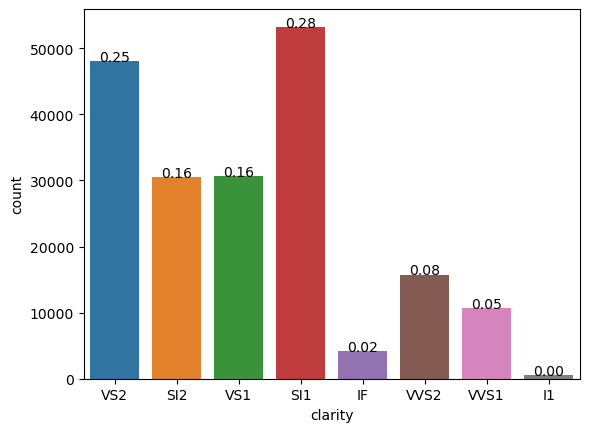

In [19]:
total = float(len(df)) # one person per row 
ax = sns.countplot(x="clarity", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

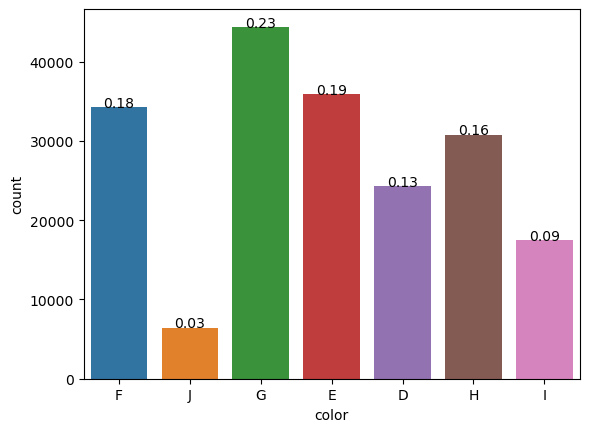

In [20]:
total = float(len(df)) # one person per row 
ax = sns.countplot(x="color", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

## Performing Bivariate Analysis

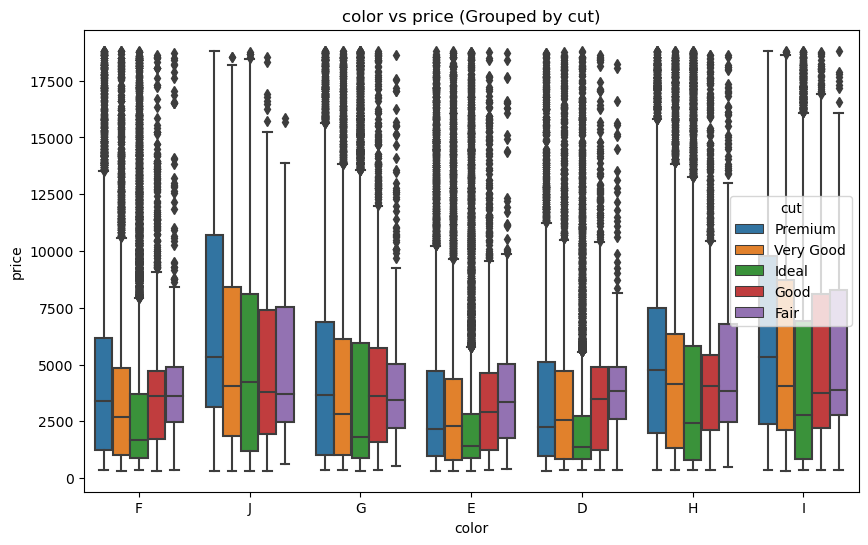

Summary Statistics for price by color and cut:

   color        cut    count         mean          std    min      25%  \
0      D       Fair    246.0  4459.837398  3289.780794  367.0  2618.50   
1      D       Good   1510.0  3729.180132  3164.718997  367.0  1234.25   
2      D      Ideal  12056.0  2359.592070  2650.763795  351.0   827.00   
3      D    Premium   5821.0  3616.039684  3555.220920  326.0   972.00   
4      D  Very Good   4653.0  3450.561358  3366.721510  337.0   855.00   
5      E       Fair    289.0  4400.612457  3835.770988  394.0  1746.00   
6      E       Good   2271.0  3581.987230  3199.185966  338.0  1244.50   
7      E      Ideal  17408.0  2466.105067  2825.136028  326.0   890.00   
8      E    Premium   8477.0  3598.599151  3723.443081  326.0   992.00   
9      E  Very Good   7424.0  3294.547548  3437.065831  326.0   811.75   
10     F       Fair    434.0  4398.472350  3378.109070  373.0  2453.50   
11     F       Good   2255.0  3882.821729  3019.321350  335.0  1

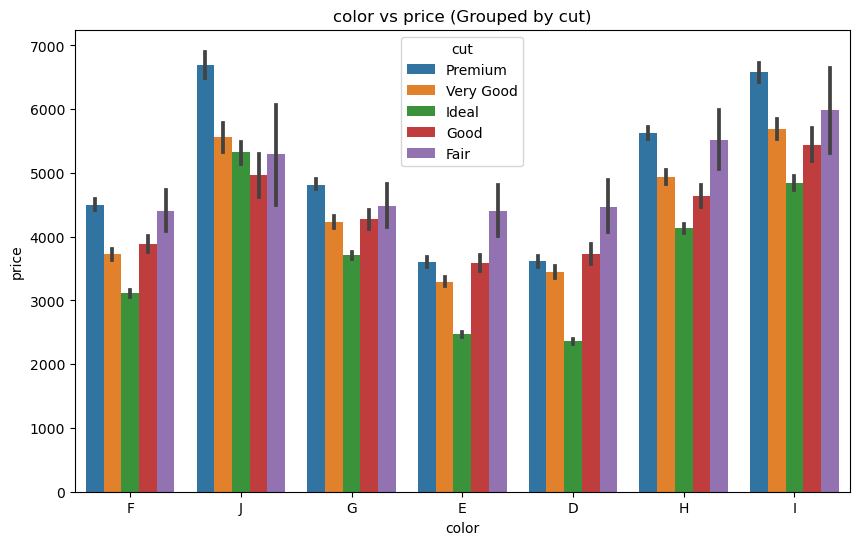

Mean price by color and cut:
color  cut      
D      Fair         4459.837398
       Good         3729.180132
       Ideal        2359.592070
       Premium      3616.039684
       Very Good    3450.561358
E      Fair         4400.612457
       Good         3581.987230
       Ideal        2466.105067
       Premium      3598.599151
       Very Good    3294.547548
F      Fair         4398.472350
       Good         3882.821729
       Ideal        3114.247037
       Premium      4503.993282
       Very Good    3722.079900
G      Fair         4474.125926
       Good         4273.455353
       Ideal        3708.856344
       Premium      4818.350445
       Very Good    4228.639494
H      Fair         5509.515406
       Good         4637.694321
       Ideal        4130.211650
       Premium      5620.072729
       Very Good    4932.357865
I      Fair         5989.763441
       Good         5436.233453
       Ideal        4846.683287
       Premium      6581.278034
       Very Good    5686.2

In [21]:
# Bivariate analysis with categorical features and continuous target
def bivariate_analysis(feature1, feature2, target):
    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature1, y=target, hue=feature2, data=df)
    plt.xlabel(feature1)
    plt.ylabel(target)
    plt.title(f'{feature1} vs {target} (Grouped by {feature2})')
    plt.legend(title=feature2)
    plt.show()

    # Calculate and display summary statistics
    grouped_data = df.groupby([feature1, feature2])
    summary_stats = grouped_data[target].describe().reset_index()
    print(f'Summary Statistics for {target} by {feature1} and {feature2}:\n')
    print(summary_stats)
    
    # Find color with highest and lowest mean price
    mean_values = grouped_data[target].mean()
    highest_price_color = mean_values.idxmax()
    lowest_price_color = mean_values.idxmin()
    print(f'\nColor with highest mean price: {highest_price_color}')
    print(f'Color with lowest mean price: {lowest_price_color}')
    

    # Bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature1, y=target, hue=feature2, data=df)
    plt.xlabel(feature1)
    plt.ylabel(target)
    plt.title(f'{feature1} vs {target} (Grouped by {feature2})')
    plt.legend(title=feature2)
    plt.show()

    # Calculate and display mean values
    mean_values = grouped_data[target].mean()
    print(f'Mean {target} by {feature1} and {feature2}:')
    print(mean_values)

# Perform bivariate analysis with categorical features and continuous target
feature1 = 'color'
feature2 = 'cut'
target = 'price'
bivariate_analysis(feature1, feature2, target)

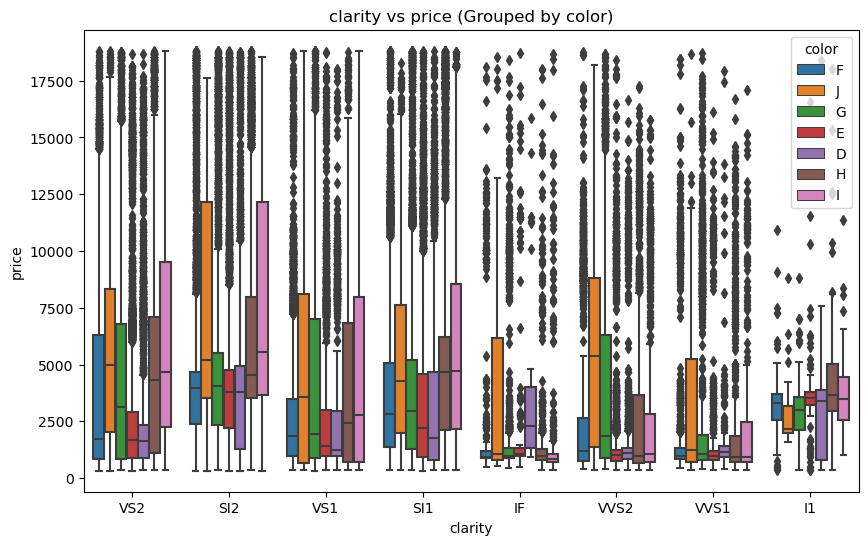

Summary Statistics for price by clarity and color:

   clarity color    count         mean          std     min      25%     50%  \
0       I1     D     60.0  3107.400000  2745.415953   345.0   803.25  3407.0   
1       I1     E    104.0  3619.913462  2116.667697   345.0  3241.25  3536.0   
2       I1     F    100.0  3276.710000  1647.967529   336.0  2559.00  3314.5   
3       I1     G     82.0  3064.024390  1576.659189   360.0  2115.50  3007.5   
4       I1     H     93.0  4341.612903  2956.457523   345.0  2935.00  3646.0   
5       I1     I     49.0  3982.714286  2058.459831  1030.0  2574.00  3484.0   
6       I1     J     24.0  2991.833333  1801.989255  1605.0  1984.50  2181.0   
7       IF     D     41.0  3915.731707  4047.766458   947.0  1316.00  2287.0   
8       IF     E    293.0  2316.392491  3478.311736   485.0   958.00  1074.0   
9       IF     F    813.0  2009.088561  3035.157519   492.0   886.00   939.0   
10      IF     G   1884.0  2147.649682  3036.645093   432.0   895.00

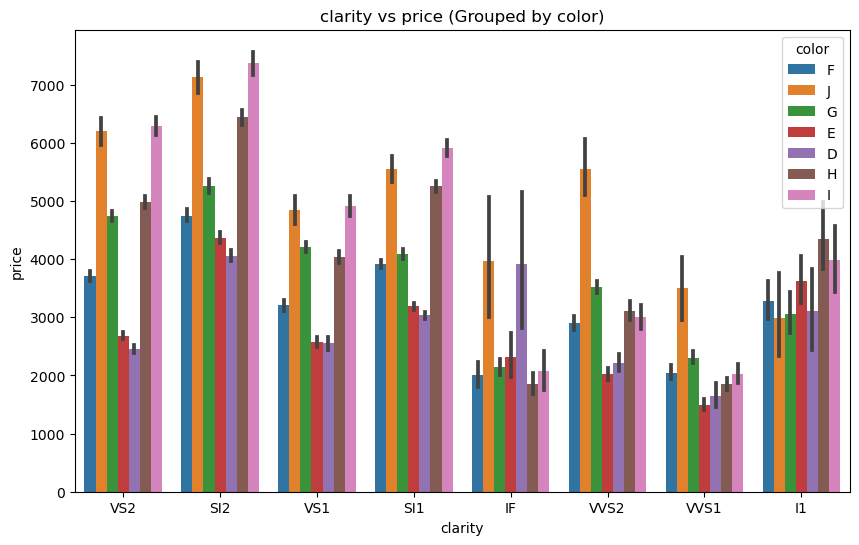

Mean price by clarity and color:
clarity  color
I1       D        3107.400000
         E        3619.913462
         F        3276.710000
         G        3064.024390
         H        4341.612903
         I        3982.714286
         J        2991.833333
IF       D        3915.731707
         E        2316.392491
         F        2009.088561
         G        2147.649682
         H        1857.798684
         I        2074.247839
         J        3965.987654
SI1      D        3030.801124
         E        3186.970484
         F        3912.657432
         G        4093.125579
         H        5252.785692
         I        5909.769994
         J        5555.004144
SI2      D        4061.068213
         E        4370.125757
         F        4748.433429
         G        5251.753077
         H        6442.220043
         I        7370.114274
         J        7140.001837
VS1      D        2551.514298
         E        2578.177072
         F        3204.588546
         G        4209

In [22]:
def bivariate_analysis(feature1, feature2, target):
    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature1, y=target, hue=feature2, data=df)
    plt.xlabel(feature1)
    plt.ylabel(target)
    plt.title(f'{feature1} vs {target} (Grouped by {feature2})')
    plt.legend(title=feature2)
    plt.show()

    # Calculate and display summary statistics
    grouped_data = df.groupby([feature1, feature2])
    summary_stats = grouped_data[target].describe().reset_index()
    print(f'Summary Statistics for {target} by {feature1} and {feature2}:\n')
    print(summary_stats)
    
    # Find color with highest and lowest mean price
    mean_values = grouped_data[target].mean()
    highest_price_color = mean_values.idxmax()
    lowest_price_color = mean_values.idxmin()
    print(f'\nColor with highest mean price: {highest_price_color}')
    print(f'Color with lowest mean price: {lowest_price_color}')
    

    # Bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature1, y=target, hue=feature2, data=df)
    plt.xlabel(feature1)
    plt.ylabel(target)
    plt.title(f'{feature1} vs {target} (Grouped by {feature2})')
    plt.legend(title=feature2)
    plt.show()

    # Calculate and display mean values
    mean_values = grouped_data[target].mean()
    print(f'Mean {target} by {feature1} and {feature2}:')
    print(mean_values)

# Perform bivariate analysis with categorical features and continuous target
feature1 = 'clarity'
feature2 = 'color'
target = 'price'
bivariate_analysis(feature1, feature2, target)

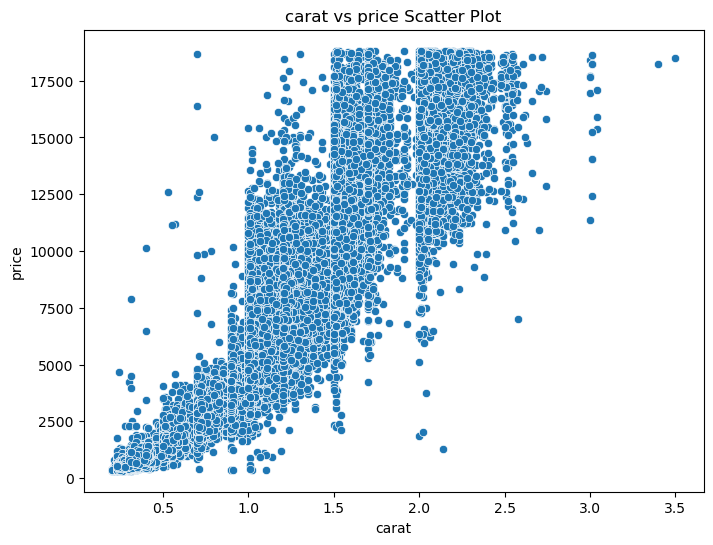

Correlation between carat and price: 0.9433960991385971
The relationship is strong and linear.
-------------------


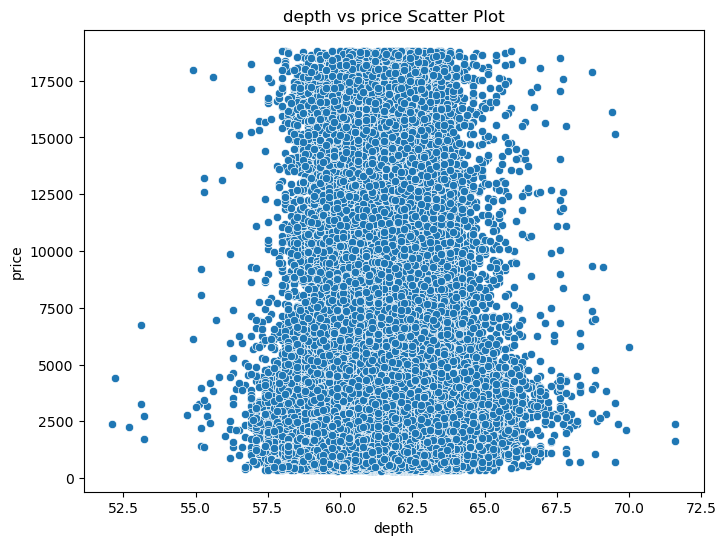

Correlation between depth and price: 0.0018795114349712636
The relationship is weak or non-linear.
-------------------


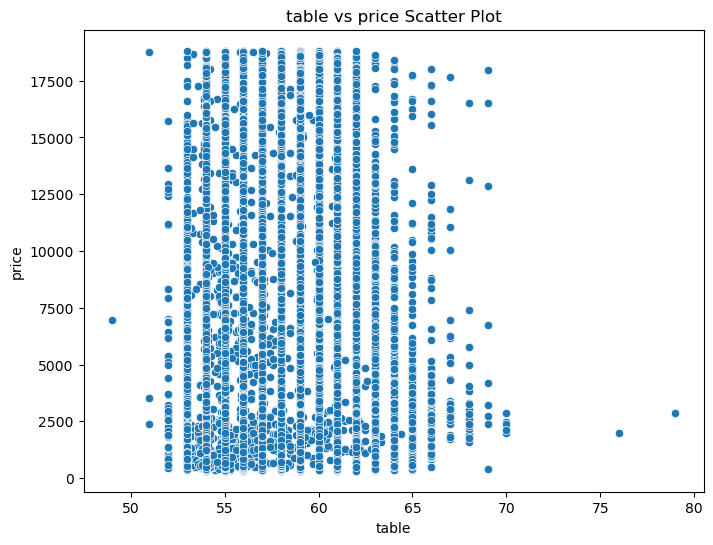

Correlation between table and price: 0.17491538202811027
The relationship is weak or non-linear.
-------------------


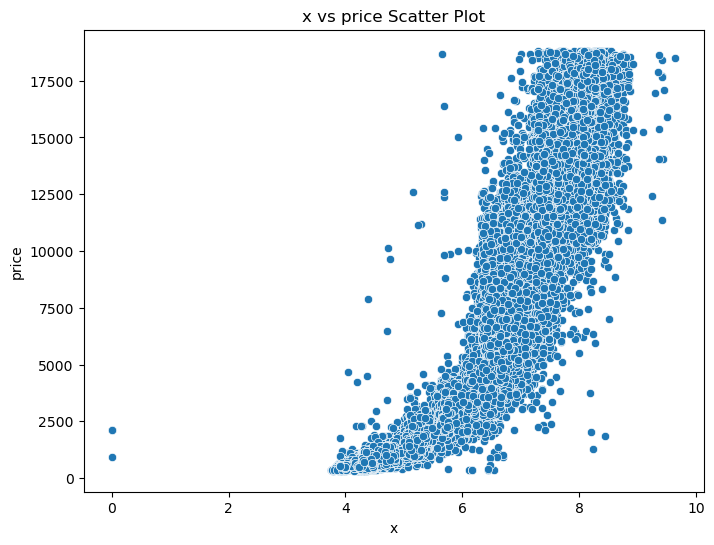

Correlation between x and price: 0.9010043932827714
The relationship is strong and linear.
-------------------


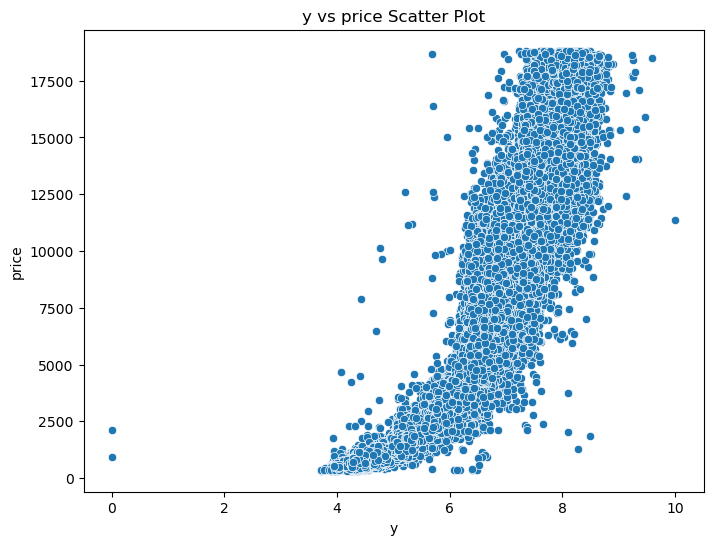

Correlation between y and price: 0.9010332326010191
The relationship is strong and linear.
-------------------


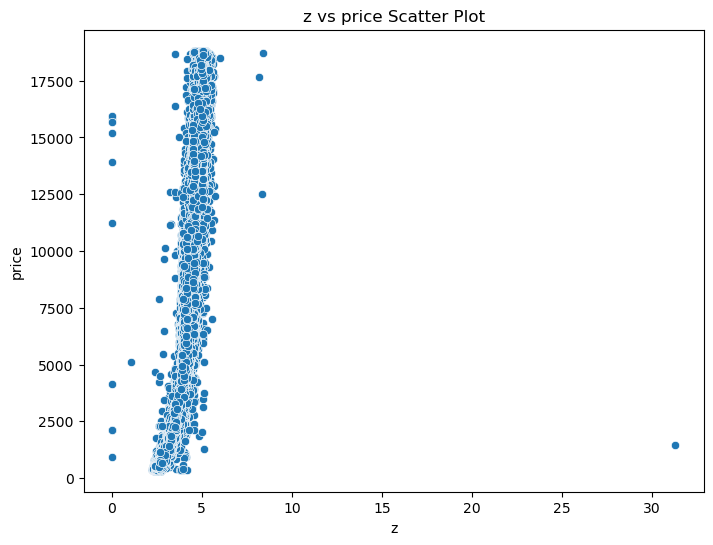

Correlation between z and price: 0.8930370352349644
The relationship is strong and linear.
-------------------


In [23]:
# Continuous to continuous analysis for each column
def continuous_to_continuous_analysis(column, target):
    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y=target, data=df)
    plt.xlabel(column)
    plt.ylabel(target)
    plt.title(f'{column} vs {target} Scatter Plot')
    plt.show()

    # Calculate correlation coefficient
    correlation = df[column].corr(df[target])
    print(f'Correlation between {column} and {target}: {correlation}')

    # Determine linearity
    if abs(correlation) >= 0.7:
        print('The relationship is strong and linear.')
    elif abs(correlation) >= 0.3:
        print('The relationship is moderate and may have a linear component.')
    else:
        print('The relationship is weak or non-linear.')

# List of columns to analyze
columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Perform continuous to continuous analysis for each column
target = 'price'
for column in columns:
    continuous_to_continuous_analysis(column, target)
    print('-------------------')

<Axes: >

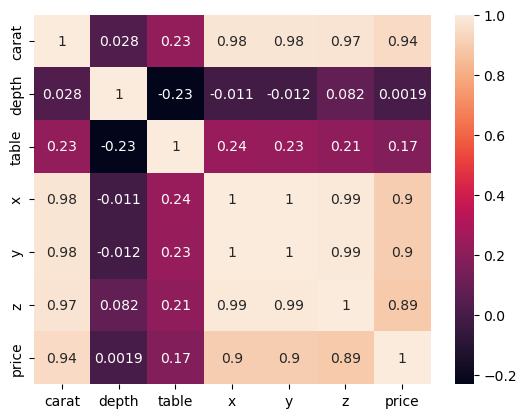

In [24]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [25]:
### We have to check multico_linearity Here 

In [28]:
def Correlation(dataset, threshold): 
    correlated_features = set()  # as a container of highly correlated features
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features



# List of columns to analyze
columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Perform correlation analysis
threshold = 0.8
correlated_features = Correlation(df[columns], threshold)

# Print the correlated features
print(f'Highly correlated features with a correlation factor > {threshold}:')
print(correlated_features)

Highly correlated features with a correlation factor > 0.8:
{'x', 'y', 'z'}


In [ ]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1)

In [ ]:
df.head()

## Converting Categorical Columns into Numerical  y performing Data Encoding

In [29]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [30]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [31]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [32]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [33]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [34]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [35]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [36]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
